## Sprawozdanie Laboratoria 5
### Marcin Hradowicz 131767

In [140]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding
from matplotlib.cm import get_cmap

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
# import warnings
# warnings.filterwarnings('ignore')

### Zbiór <i>Cars</i>

In [141]:
cars = pd.read_csv('data/cars.csv', header=None)
cars = cars.rename(columns={0:'labels'})
cars[[1,2,3,4]] = StandardScaler().fit_transform(cars[[1,2,3,4]])
cars

,labels,1,2,3,4
0,'Alfa Romeo 156',0.592557,-1.805652,0.788640,0.954184
1,'Audi A4',0.355534,0.480726,1.938918,1.330835
2,'BMW 316l',-0.118511,0.832476,1.340169,0.577532
3,'Daewoo Lanos',0.948091,0.744538,-1.087500,-1.305725
4,'Honda Civic',-1.066602,-0.486588,-0.362622,0.200881
5,'Hyunday Accent',-1.422136,0.304850,-1.066790,-1.682377
6,'Lada Samara',-0.474045,1.448039,-1.605271,-1.682377
7,'Mitsubishi Carisma',-0.474045,0.568663,0.243169,0.954184
8,'Opel Astra II',-0.711068,0.568663,0.054183,0.577532
9,'Peugeot 206 XR',-1.185114,1.623914,-0.908455,-0.929074


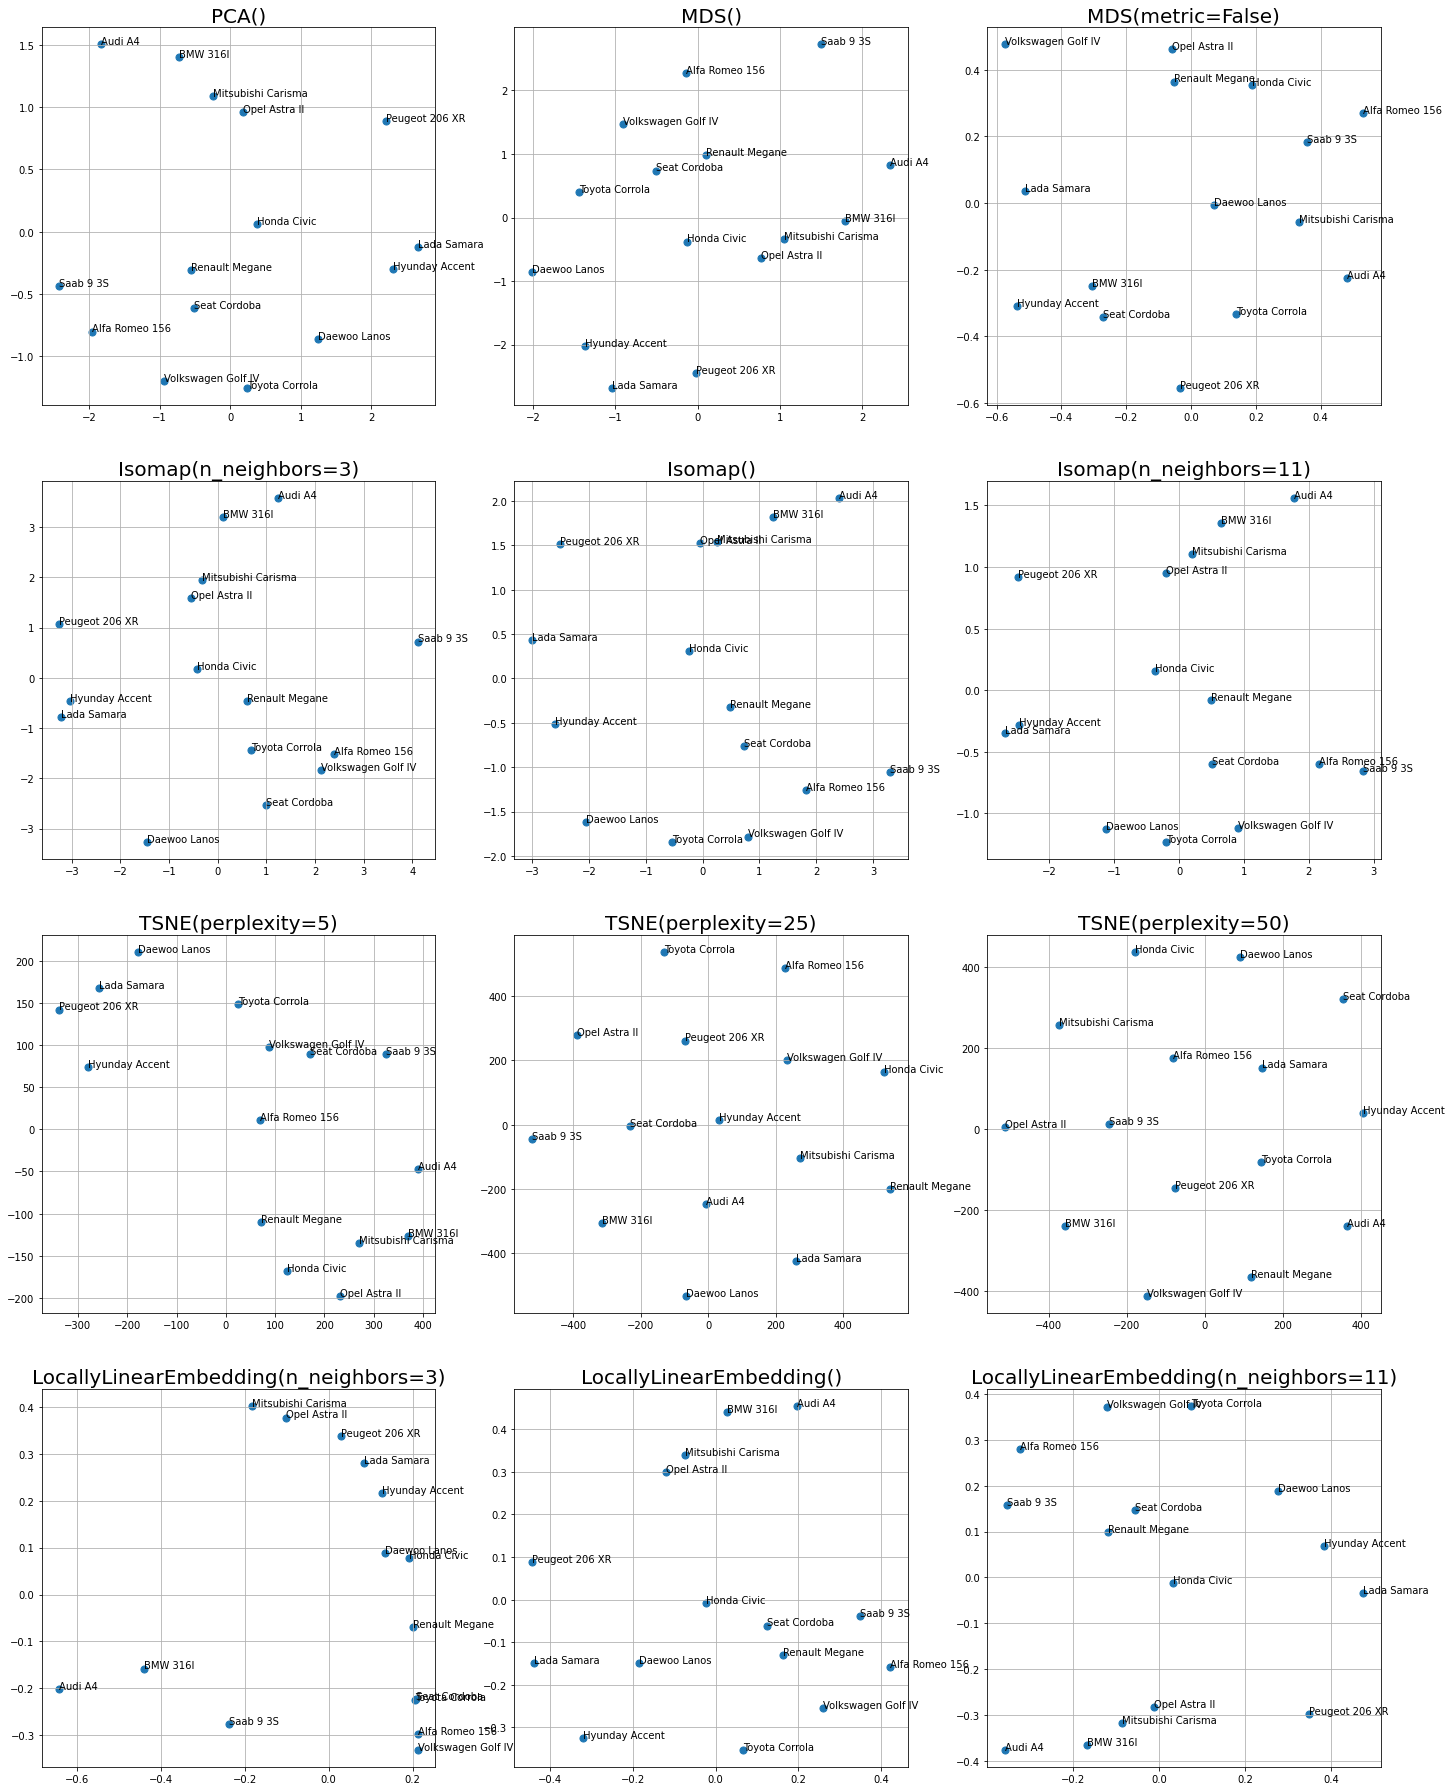

In [142]:
algs = [PCA(), 
        MDS(metric=True), MDS(metric=False), 
        Isomap(n_neighbors=3), Isomap(n_neighbors=5), Isomap(n_neighbors=11), 
        TSNE(perplexity=5), TSNE(perplexity=25), TSNE(perplexity=50),
        LocallyLinearEmbedding(n_neighbors=3), LocallyLinearEmbedding(n_neighbors=5), LocallyLinearEmbedding(n_neighbors=11)]
n_of_cols = 3
n_of_rows = math.ceil(len(algs)/n_of_cols)
fig = plt.figure(figsize=(n_of_cols*8, n_of_rows*8))

for i, alg in enumerate(algs):
    principalComponents = alg.fit_transform(cars[[1,2,3,4]])
    principalDf = pd.DataFrame(data = principalComponents[:, :2], columns = ['pc1', 'pc2'])
    finalDf = pd.concat([principalDf, cars[['labels']]], axis = 1)
    
    ax = fig.add_subplot(n_of_rows, n_of_cols, i+1)
    ax.set_title(str(alg), fontsize = 20)


    ax.scatter(finalDf.loc[:, 'pc1'], finalDf.loc[:, 'pc2'], s = 50)
    
    targets = finalDf['labels'].unique()
    targets = [x.replace('\'', '') for x in targets]
    for i, txt in enumerate(targets):
        ax.annotate(txt, (finalDf.loc[i, 'pc1'], finalDf.loc[i, 'pc2']))
    ax.grid()

Dla zbioru *cars* **PCA**, **MDS(metric=True)**, **Isomap** i **TSNE** pokazują podobne zależności, jeżeli odpowiednio dobierzemy parametry `n_neighbors` lub `perplexity`. Czwórka punktów: 'Opel Astra II', 'Mitsubishi Carisma', 'BMW 316i' oraz 'Audi A4' dla tych algorytmów znajdują się blisko siebie. Trzeba wziąć pod uwagę, iż duże wartości tych parametrów nie mają większego sensu, ze względu na małą liczbę przykładów w zbiorze.

### Zbiór <i>swissroll</i>

In [153]:
swissroll = pd.read_csv('data/swissroll.dat', header=None, delim_whitespace=True)
swissroll['labels'] = pd.read_csv('data/preswissroll_labels.dat', header=None, delim_whitespace=True)
swissroll[[0, 1]] = StandardScaler().fit_transform(preswissroll[[0,1]])
swissroll

,0,1,2,labels
0,-0.562625,-1.086514,6.729247,1.0
1,-0.789628,-0.586691,7.896089,1.0
2,-0.513957,-1.609813,6.088567,1.0
3,-1.261990,-0.631048,2.362335,1.0
4,-1.366763,-0.871084,0.532386,1.0
...,...,...,...,...
1595,1.288034,1.161975,10.424269,4.0
1596,0.918779,1.431453,-1.233169,4.0
1597,0.924882,0.813246,-1.032280,4.0
1598,0.718338,0.709517,-7.069101,4.0


In [173]:
from sklearn import manifold, datasets
X, color = datasets.make_swiss_roll(n_samples=1500)
swissroll = pd.DataFrame(X)
swissroll['labels'] = color


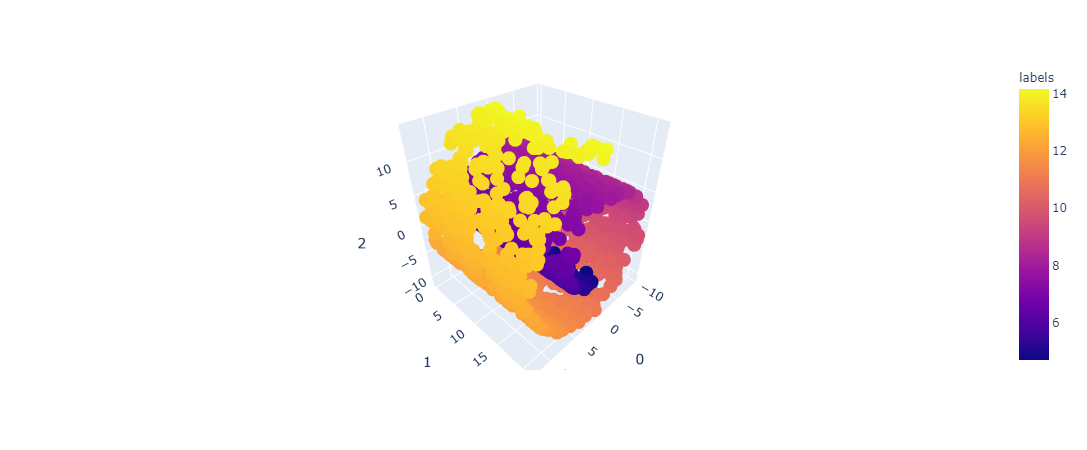

In [181]:
import plotly.express as px

fig = px.scatter_3d(swissroll, x=0, y=1, z=2,
              color='labels')
fig.show()

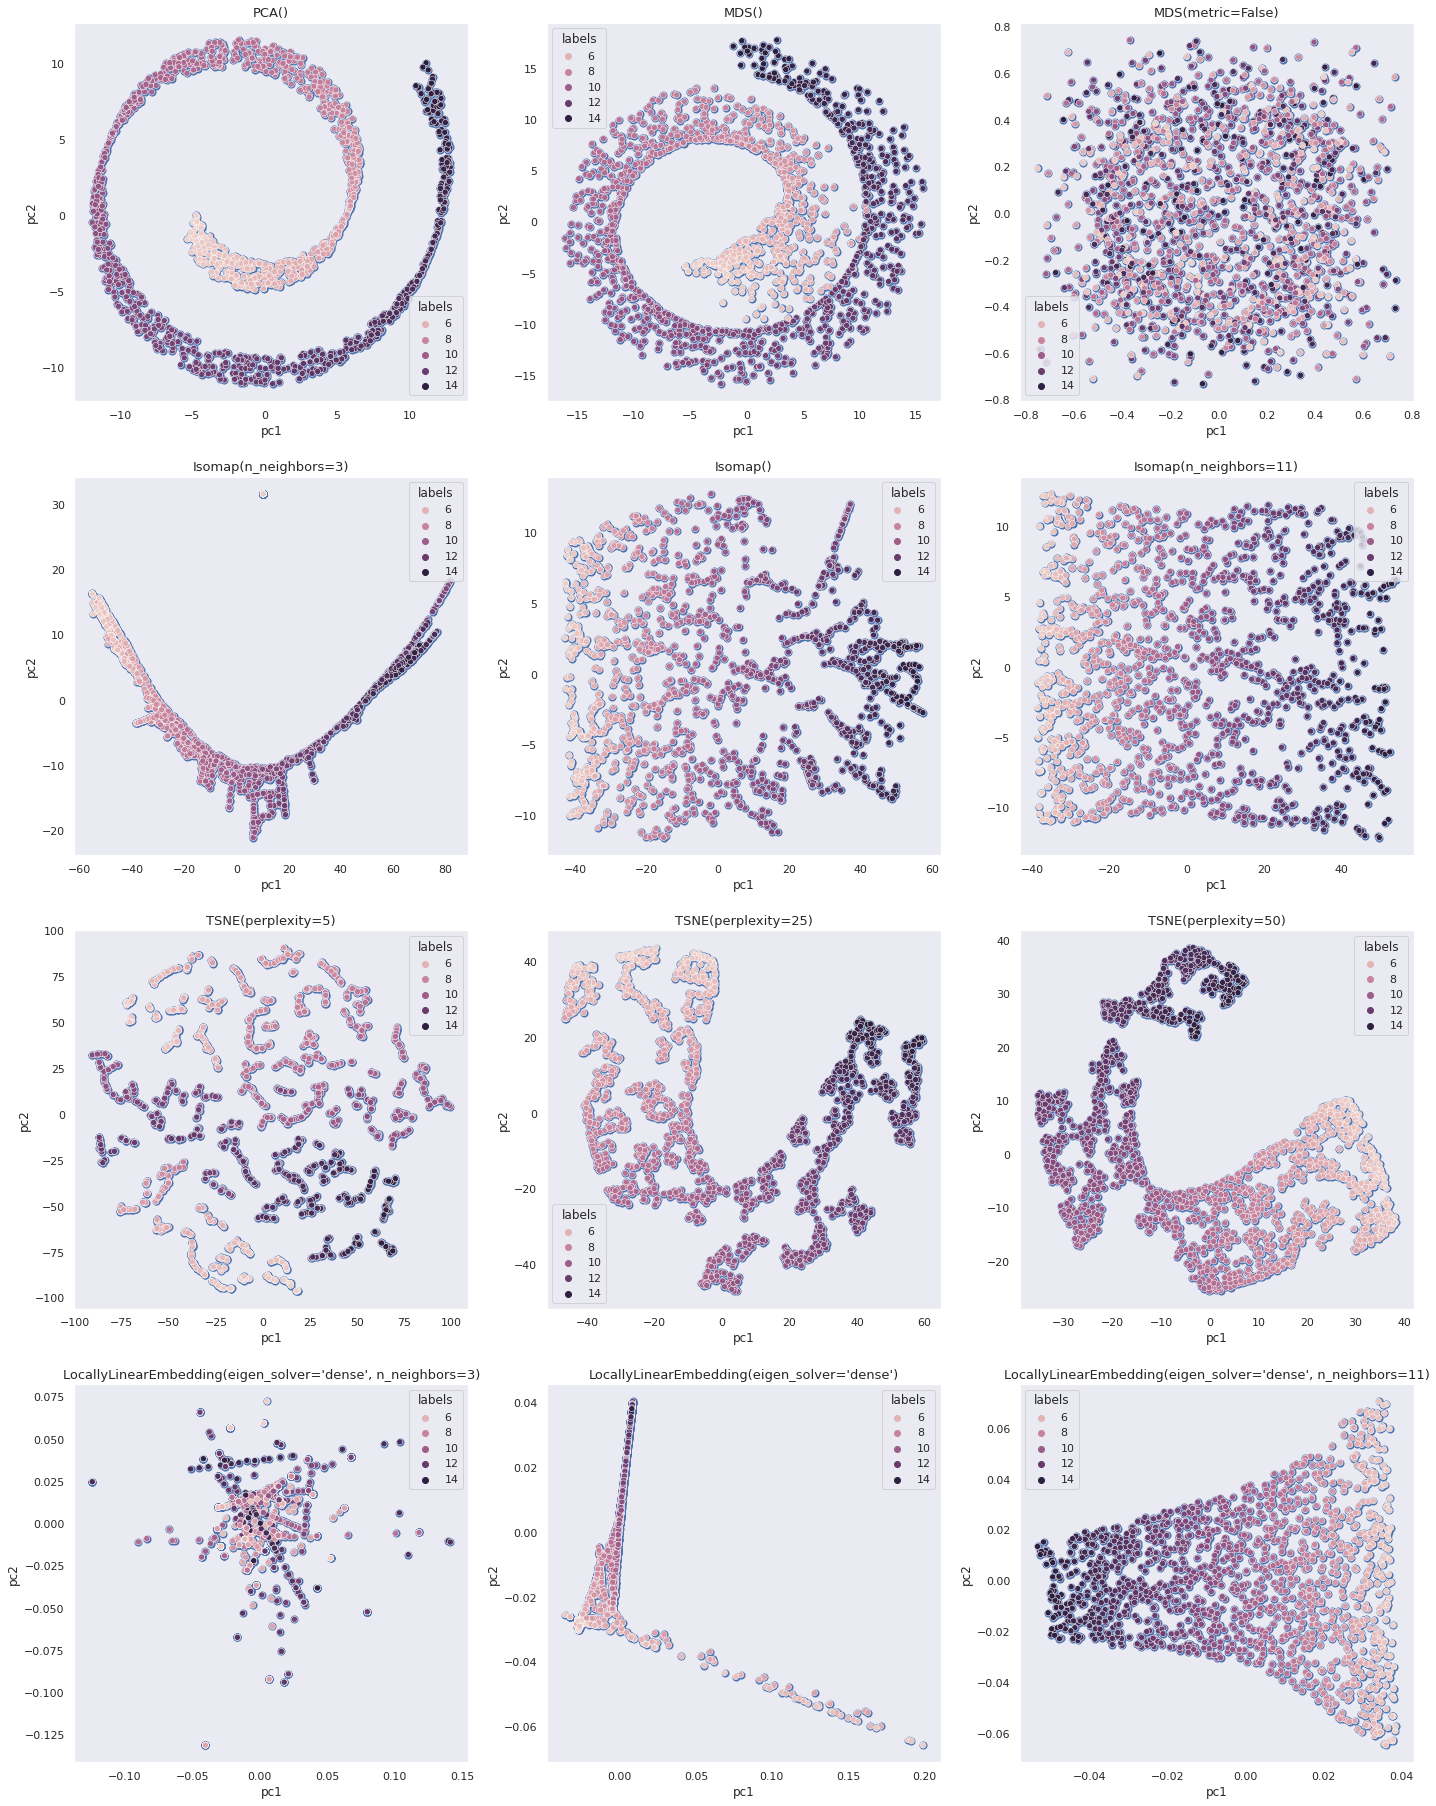

In [186]:
algs = [PCA(), 
        MDS(metric=True), MDS(metric=False), 
        Isomap(n_neighbors=3), Isomap(n_neighbors=5), Isomap(n_neighbors=11), 
        TSNE(perplexity=5), TSNE(perplexity=25), TSNE(perplexity=50),
        LocallyLinearEmbedding(n_neighbors=3, eigen_solver ="dense" ), LocallyLinearEmbedding(n_neighbors=5, eigen_solver ="dense" ), LocallyLinearEmbedding(n_neighbors=11,eigen_solver ="dense" )
       ]
n_of_cols = 3
n_of_rows = math.ceil(len(algs)/n_of_cols)
fig = plt.figure(figsize=(n_of_cols*8, n_of_rows*8))

for i, alg in enumerate(algs):
    principalComponents = alg.fit_transform(swissroll[[0,1,2]])
    principalDf = pd.DataFrame(data = principalComponents[:, :2], columns = ['pc1', 'pc2'])
    finalDf = pd.concat([principalDf, swissroll[['labels']]], axis = 1)
    
    ax = fig.add_subplot(n_of_rows, n_of_cols, i+1)
    ax.set_title(str(alg), fontsize = 13)

    ax.scatter(finalDf.loc[:, 'pc1'], finalDf.loc[:, 'pc2'], s = 50)
    sns.scatterplot(data=finalDf, x='pc1', y='pc2', hue='labels',ax=ax)
    ax.grid()

**PCA** oraz **MDS** pokazują zbiór tak naprawdę z uciętym jednym wymiarem względem oryginalnych danych trójwymiarowych. **MDS** radzi sobie trochę gorzej. **MDS(metric=False)**, który zachowuje monotoniczność korelacji między punktami, tzn. jeżeli S<sub>15</sub> (podonieństwo punktów 1 i 5) było mniejsze od S<sub>37</sub> przed redukcją to po redukcji także będzie mniejsze, nie pokazuje nic istotnego. **Isomap**, kóry korzysta z odległosći geodezyjnej (ang. *geodesic distance*) dla większych wartości `n_neighbors` ukazuje ładne sąsiedztwo kolejnych punktów. Podobnie jest z **LocallyLinearEmbedding (LLE)**, który charakteryzuje przykład za pomocą liniowej kombinacji jego *k* sąsiadów. **TSNE** jak widać jest bardziej rozczłonkowane, przez posiadanie przez niego możliwości tworzenia wielu skupisk zamiast jednego centralnego, co jest spowodowane jego lokalnym charakterem.

### MNIST - zbiór ręcznie pisanych cyfr

In [145]:
from sklearn.datasets import load_digits
mnist, labels = load_digits(as_frame=True, return_X_y= True)
mnist['labels'] = labels
mnist

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,labels
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


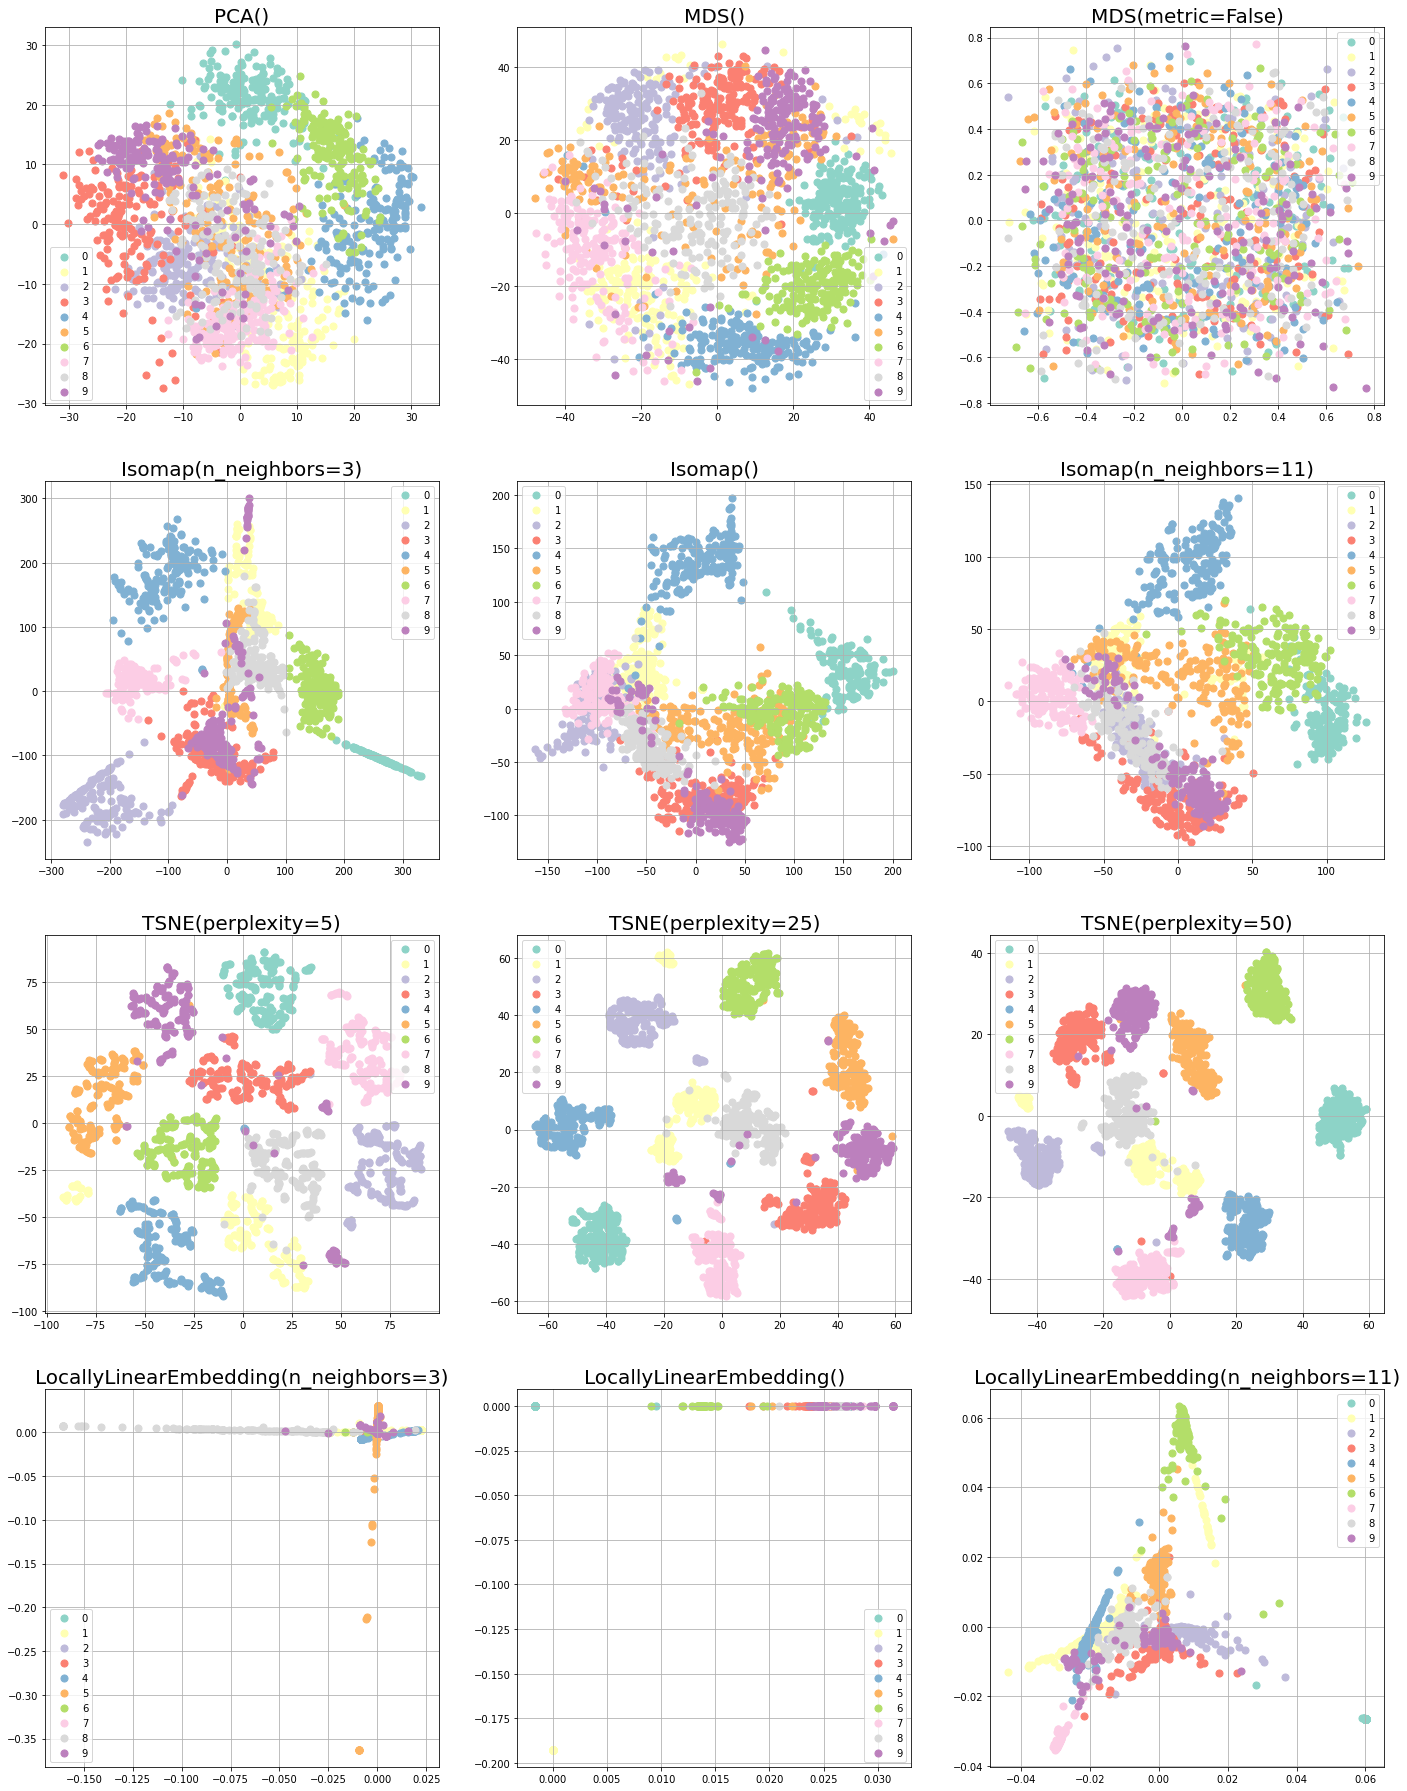

In [146]:
algs = [PCA(), 
        MDS(metric=True), MDS(metric=False), 
        Isomap(n_neighbors=3), Isomap(n_neighbors=5), Isomap(n_neighbors=11), 
        TSNE(perplexity=5), TSNE(perplexity=25), TSNE(perplexity=50),
        LocallyLinearEmbedding(n_neighbors=3), LocallyLinearEmbedding(n_neighbors=5), LocallyLinearEmbedding(n_neighbors=11)]
n_of_cols = 3
n_of_rows = math.ceil(len(algs)/n_of_cols)
fig = plt.figure(figsize=(n_of_cols*8, n_of_rows*8))

for i, alg in enumerate(algs):
    principalComponents = alg.fit_transform(mnist.loc[:,~mnist.columns.isin(['labels'])])
    principalDf = pd.DataFrame(data = principalComponents[:, :2], columns = ['pc1', 'pc2'])
    finalDf = pd.concat([principalDf, mnist[['labels']]], axis = 1)
    
    ax = fig.add_subplot(n_of_rows, n_of_cols, i+1)
    ax.set_title(str(alg), fontsize = 20)

    targets = finalDf['labels'].unique()
    colors = get_cmap("Set3").colors
    colors = np.array([list(color) for color in get_cmap("Set3").colors])
    
    for target, color in zip(targets, colors):
        indicesToKeep = finalDf['labels'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'pc1'], finalDf.loc[indicesToKeep, 'pc2'], c = color.reshape(1,-1), s = 50)
    ax.legend(targets)
    ax.grid()

Dla zbioru *MNIST* **PCA** oraz **MDS** radzą sobie bardzo dobrze. Isomap dla parametru `n_neighbors` równych 5 czy 11 także zachowuje się całkiem nieźle. **LLE** nie poradziło sobie kompletnie. Za to **TSNE** poradził sobie świetnie, widać przewagę możliwości wydzielania kilku skupisk dla tej samej klasy.